In [1]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv("/home/surabhi/Downloads/costello_ace_2017-2018.csv")

In [7]:
df.isnull().sum()

Date                               0
Transaction Time                   0
Customer Number                    0
Receipt Number                     0
Store #                            0
Store Name                         0
Scanned UPC                     1834
Item Number                        0
Item Description                   0
Net Sales Units                    0
Net Sales                          0
Cost                               0
Gross Margin                       0
Gross Margin %                 11875
Department Code                    0
Department Name                    0
Class Code                      2927
Class Name                         0
Fineline Code                 131943
Fineline Name                      0
Item was Scanned                 288
MIP Promo ID                  516534
Promo/Discount                434353
Dynamic Promo ID                   0
Actual Price                       0
Retail Price                       0
Actual-Retail                      0
T

In [54]:
df['Department Name'].dtype

dtype('O')

In [20]:
new_df = df[['Receipt Number', 'Item Description', 'Net Sales Units']]

In [22]:
new_df["Net Sales Units"] = new_df["Net Sales Units"].str.replace(",","").astype(float)

/home/surabhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Hour'] = pd.to_datetime(df['Transaction Time'], format='%H:%M:%S').dt.hour

In [164]:
hour_df = pd.DataFrame(df['Transaction Time'])

In [165]:
hour_df['Hour'] = pd.to_datetime(hour_df['Transaction Time'], format='%H:%M:%S').dt.hour

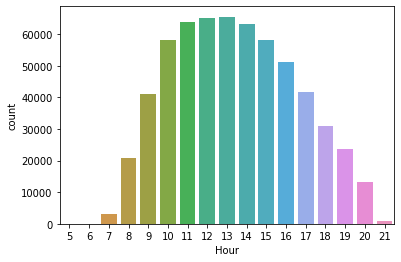

In [167]:
sns.countplot(hour_df['Hour'])

[Text(0, 0, 'Manual Override'),
 Text(0, 0, 'Promotion'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Category Price Plan'),
 Text(0, 0, 'No Charge'),
 Text(0, 0, 'Return Validation'),
 Text(0, 0, 'Quantity Break'),
 Text(0, 0, 'Loyalty'),
 Text(0, 0, 'Open Quote'),
 Text(0, 0, 'Multiple Selling Price'),
 Text(0, 0, '*'),
 Text(0, 0, 'Average Cost'),
 Text(0, 0, 'Replacement Cost')]

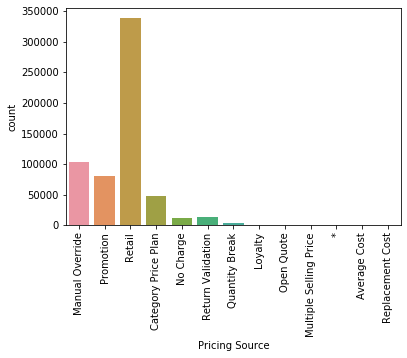

In [341]:
g = sns.countplot(df['Pricing Source'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [201]:
max_items = pd.DataFrame(df[['Receipt Number','Item Description']])

In [247]:
max_items_groupby = max_items.groupby(['Receipt Number'])['Item Description'].unique()
a=[]
for i in range(len(max_items_groupby)):
    a.append(len(max_items_groupby[i]))

In [255]:
max_items_df = pd.DataFrame(a)

In [261]:
import numpy as np

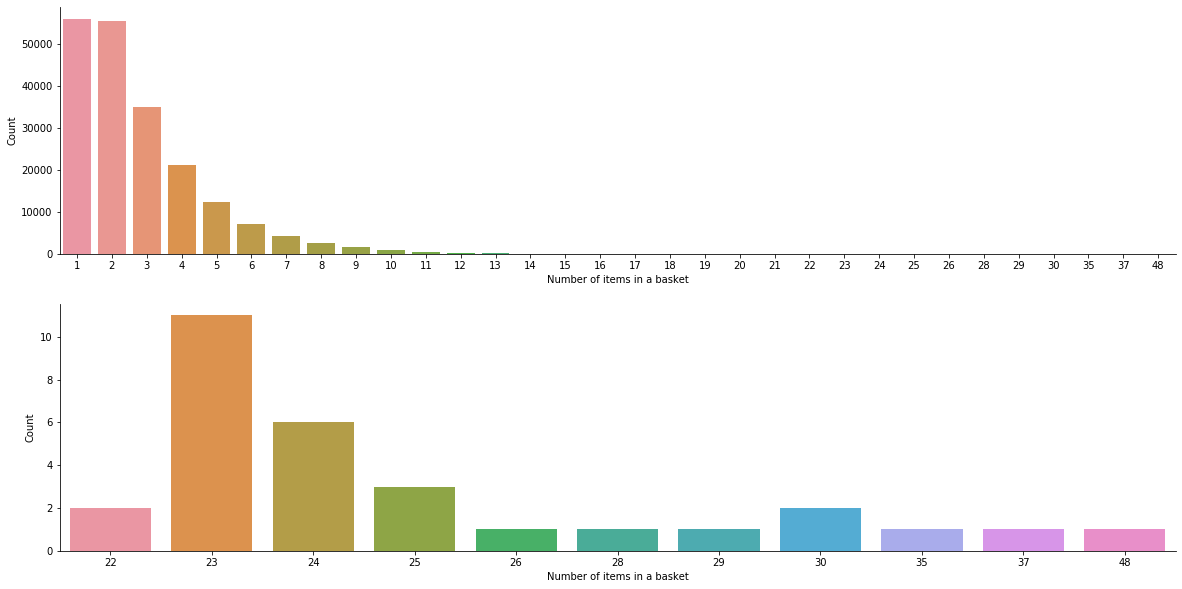

In [438]:
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1,figsize=(20,10))
a = sns.countplot(max_items_df[0],ax = ax[0]);
a.set(xlabel='Number of items in a basket', ylabel='Count')
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
b = sns.countplot(max_items_df[0].sort_values(ascending=False).head(30),ax = ax[1]);
b.set(xlabel='Number of items in a basket', ylabel='Count')
b.spines['right'].set_visible(False)
b.spines['top'].set_visible(False)

In [285]:
df['Item Description'].value_counts()

CMN Donations                      69373
FASTENERS                          34288
TOP SOIL 40#                        4280
7287154 $20 INST SAVINGS            3007
FERTILIZR 4STEP PRGM 5M             2888
KEY KWIKSET KW1-ACE250PK            2817
APRIL M1 $5 OFF $20                 2742
KEY SCHLAGE SC1-ACE250PK            2045
BIRDSEED WILDBIRD 20#ACE            2042
MULCH  LI COLOR ENH BLK MULCH       2005
CONTRACTOR BAGS 3MIL. 20CNT         1864
LIBERTY GARDEN SEEDS-ASSORTED       1567
JUMBO MKT PACK 804/806 FLWR/VEG     1553
6187116 $3 INST SAVINGS             1506
7301609 $3 INST SAVINGS             1385
IN-STORE COUPON SAVE $5.00          1365
$5 REWARDD                          1341
7206436 $7 INST SAVINGS             1332
APRIL M1 $5 OFF $25                 1315
LIQUID ANT BAIT 6PK                 1313
$5 REWARDB                          1289
COSTELLO'S SUN & SHADE 3#           1245
7439524 $1 INST SAVINGS             1241
EZ SEED SUN&SHADE 10#               1239
71162 $4 INST SA

In [319]:
df['Department Code'].value_counts()

70    107623
14     70872
DO     69714
56     40698
50     39464
40     38150
30     28743
64     26084
I1     23986
10     23584
20     22467
34     18655
94     16487
H2     14958
80     12284
88      9922
84      8441
46      6240
76      5254
90      3843
58      2563
LP      2185
9       2162
60      1234
59      1108
28      1026
GS       982
IG       477
I9       475
MI       106
CR        36
H4        31
79        31
GC        29
LA        27
SO        27
MK         9
OI         9
DP         7
H1         3
RE         2
99         1
QX         1
Name: Department Code, dtype: int64

In [288]:
df['Department Name'].value_counts()

LAWN, GARDEN & FARM SUPPLIES        107623
PAINT & PAINT SUPPLIES               70872
DONTATIONS                           69714
FASTENERS                            40698
HARDWARE                             39464
PLUMBING SUPPLIES & FIXTURES         38150
FLASHLIGHTS, LIGHTING & SUPPLIES     28743
HOUSEWARES & GIFTS                   26084
ACE REWARDS INSTANT SAVINGS          23986
CLEANING SUPPLIES                    23584
HAND TOOLS & TOOL ACCESSORIES        22467
ELECTRICAL SUPPLIES                  18655
NOTIONS & MISCELLANEOUS              16487
IN STORE COUPONS                     14958
SPORTING GOODS                       12284
OUTDOOR LIVING & FURNITURE            9922
AUTOMOTIVE                            8441
HEATING & COOLING SUPPLIES            6240
OUTDOOR EQUIPMENT & POWER TOOLS       5254
STATIONARY & STORE SUPPLIES           3843
BUILDING MATERIALS & PRODUCTS         2563
LIPA INSTANT REBATE                   2185
SODA/ETC                              2162
APPLIANCES 

In [322]:
df['Class Name'].value_counts()

DONATIONS                    69512
ACE COUPON/CREDIT ITEMS      36532
HILLMAN GROUP, INC.          35525
BAG PRODUCTS                 18369
CANDY AND FOODS              12139
FERTILIZERS                  11864
GRASS SEED                   10937
INCANDESCENT LIGHT BULBS     10645
NURSERY/LIVE GOODS           10168
INSECTICIDES/REPELLENTS      10045
KEYS                         10035
LIQUID PAINT- NATIONAL        8217
WEED CONTROL PRODUCTS         8130
PAINT ROLLERS                 8057
SPRAY PAINTS                  7410
PLASTIC FITTINGS              7400
BIRD PRODUCTS                 7374
TRASH BAGS                    7058
PAINT BRUSHES                 6412
HOUSEHOLD CLEANERS            5933
BATTERIES                     5923
CAULK/SEALANTS/GLAZING        5422
LED LIGHT BULBS               5378
GLUES/ADHESIVES/APPLICATR     5311
HAND/POWER SANDING ABRASI     3958
HOSE FITTINGS                 3854
REWARDS CARD                  3753
HOSE NOZZLES                  3303
TAPES               

In [348]:
def load_column(cols):
    return pd.read_csv("/home/surabhi/Downloads/costello_ace_2017-2018.csv", usecols = [cols])
    

In [347]:
def plot_count_plot(df, col):
    g = sns.countplot(df[col])
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [350]:
df_price_src = load_column('Pricing Source')

In [355]:
df_price_src['Pricing Source'].value_counts().sort_values(ascending = True).head(5)

Replacement Cost      22
Pricing Source        23
Open Quote          1130
*                   3061
Average Cost        4436
Name: Pricing Source, dtype: int64

In [357]:
frame = df_price_src['Pricing Source'].value_counts().sort_values(ascending = True).head(5)

In [364]:
df_price_src_low = df_price_src[df_price_src['Pricing Source'].isin(frame.index)]

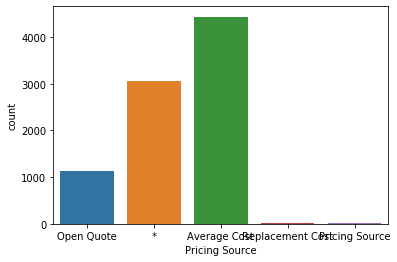

In [365]:
sns.countplot(df_price_src_low['Pricing Source'])

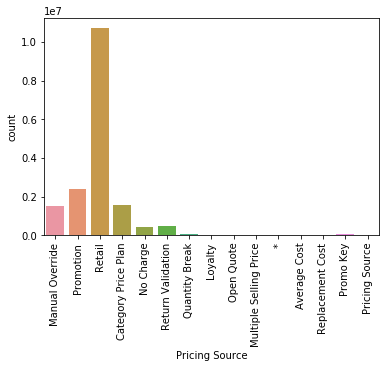

In [352]:
plot_count_plot(df_price_src, 'Pricing Source')